In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
import pytz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action = 'ignore', category= FutureWarning)
%matplotlib inline

In [83]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/INDAthon/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/INDAthon


In [84]:
df = pd.read_csv('training_jumlah_penumpang_tj.csv', sep = ';')
data.head()

,bulan,tahun,jumlah_penumpang
0,1,2015,8738599
1,2,2015,7630313
2,3,2015,9383835
3,4,2015,8832441
4,5,2015,9035420


In [85]:
#df = data[['bulan', 'jumlah_penumpang']]

<ipython-input-86-3d5081a88b6b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'Distribution')

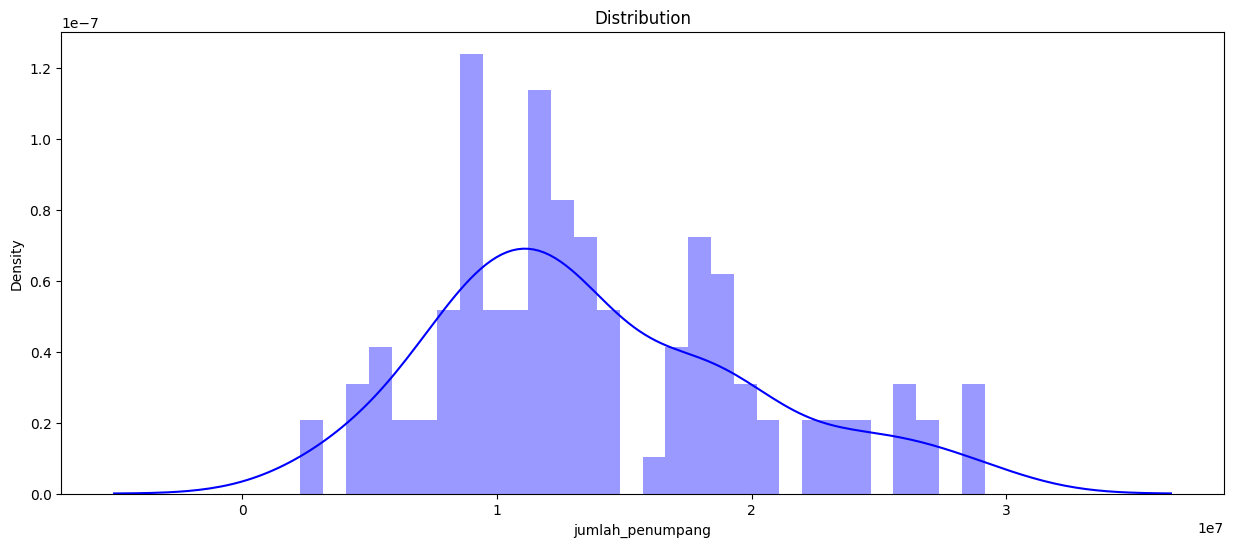

In [86]:
fig, ax = plt.subplots(figsize = (15,6))
sns.distplot(df['jumlah_penumpang'], kde = True, color='blue', bins = 30, ax = ax)
ax.set_title("Distribution")

Text(0.5, 1.0, 'Distribution')

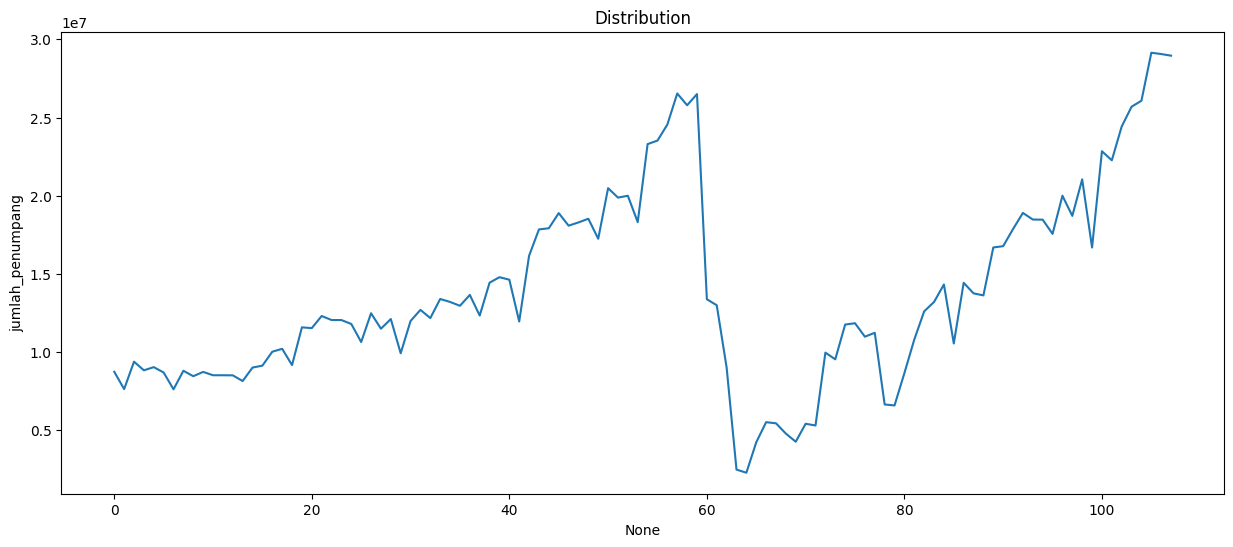

In [87]:
fig, ax = plt.subplots(figsize = (15,6))
sns.lineplot(x = df.index, y = df['jumlah_penumpang'], ax=ax)
ax.set_title("Distribution")

In [88]:
df['jml'] = df['jumlah_penumpang'].shift(1)
df.dropna(inplace = True)
df.head()

,bulan,tahun,jumlah_penumpang,jml
1,2,2015,7630313,8738599.0
2,3,2015,9383835,7630313.0
3,4,2015,8832441,9383835.0
4,5,2015,9035420,8832441.0
5,6,2015,8692562,9035420.0


In [89]:
df.corr()

,bulan,tahun,jumlah_penumpang,jml
bulan,1.000000,-0.023613,0.186204,0.142503
tahun,-0.023613,1.000000,0.443483,0.433318
jumlah_penumpang,0.186204,0.443483,1.000000,0.932578
jml,0.142503,0.433318,0.932578,1.000000


Text(0, 0.5, 'jumlah_penumpang')

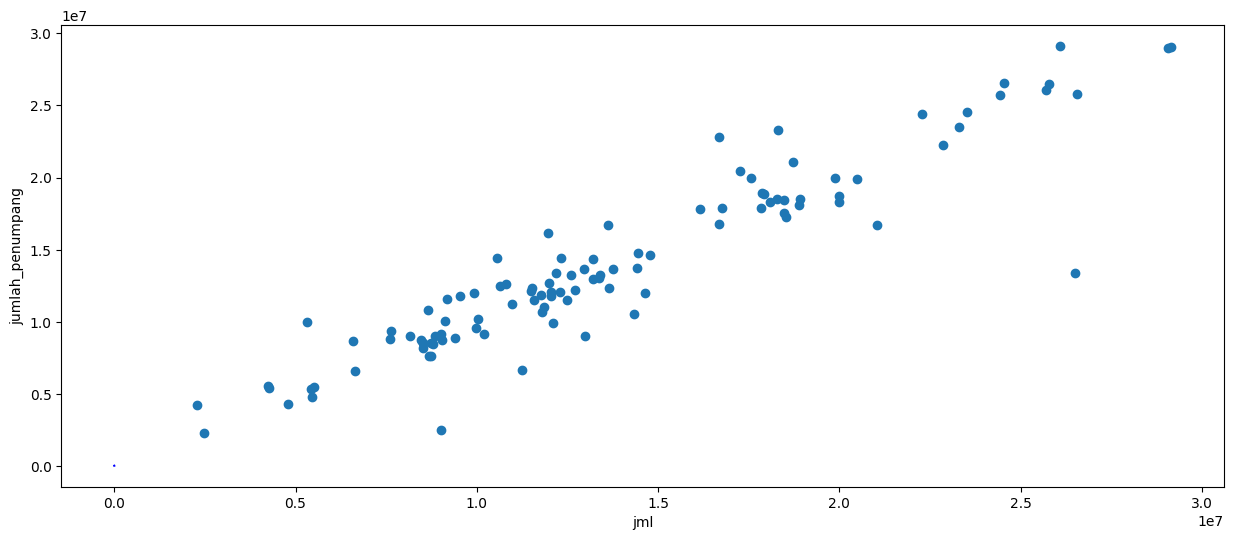

In [90]:
fig, ax = plt.subplots(figsize = (15,6))
ax.scatter(x=df["jml"], y = df['jumlah_penumpang'])
ax.plot([0,800], [0,800], color= "blue")
plt.xlabel('jml')
plt.ylabel('jumlah_penumpang')

In [91]:
target = "jumlah_penumpang"
y = df[target]
X = df.drop([target, 'bulan'], axis=1)

In [92]:
cutoff = int(len(X) * 0.8)
train_x, train_y = X.iloc[:cutoff], y.iloc[:cutoff]
test_x, test_y = X.iloc[cutoff:],y.iloc[cutoff:]

In [93]:
test_x

,tahun,jml
86,2022,10550000.0
87,2022,14430000.0
88,2022,13756000.0
89,2022,13624000.0
90,2022,16689000.0
91,2022,16774000.0
92,2022,17870000.0
93,2022,18900000.0
94,2022,18476000.0
95,2022,18469000.0


In [94]:
y_pred_baseline  = [train_y.mean()]*len(train_y)
mae_baseline = mean_absolute_error(train_y, y_pred_baseline)
print("mean jumlah:", round(train_y.mean(),2))
print("baseline MAE:", round(mae_baseline,2))

mean jumlah: 12237748.49
baseline MAE: 3979981.13


In [95]:
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

In [96]:
training_mae = mean_absolute_error(train_y, model.predict(train_x))
test_mae = mean_absolute_error(test_y, model.predict(test_x))
print('training mae=', round(training_mae, 2))
print("test mae", round(test_mae, 2))

training mae= 1404518.07
test mae 2095597.06


In [97]:
intercept = model.intercept_.round(2)
coefficient = model.coef_.round(2)[0]
model
#print(f"jumlah penumpang = {intercept}+({coefficient}*jml)")


In [98]:
test_x[-1:]

,tahun,jml
107,2023,29062581.0


In [99]:
df_pred_test = pd.DataFrame(
    {
        "y_test": test_y,
        "y_pred": model.predict(test_x)
    }
)
df_pred_test.head(50)

,y_test,y_pred
86,14430000,1.051087e+07
87,13756000,1.404526e+07
88,13624000,1.343130e+07
89,16689000,1.331106e+07
90,16774000,1.610304e+07
91,17870000,1.618047e+07
92,18900000,1.717885e+07
93,18476000,1.811710e+07
94,18469000,1.773087e+07
95,17558000,1.772449e+07


In [100]:
model.predict(test_x[-1:])

array([27320489.37515634])

In [101]:
fig = px.line(df_pred_test, labels = {"value": "jumlah"}, title = "Linear Regression Model: Actual price")
fig.show()